In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

## Amsterdam

In [2]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

amsterdam_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2020-12.csv')
amsterdam_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(amsterdam_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_12_12_2020['price'].mean(),2)}.")


amsterdam_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-01.csv')
amsterdam_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(amsterdam_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_1_9_2021['price'].mean(),2)}.")

amsterdam_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-02.csv')
amsterdam_raw_df_2_8_2021['Month']='2/8/2021' 
print(f"The 2_8_2021 dataset contains {len(amsterdam_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_2_8_2021['price'].mean(),2)}.")

amsterdam_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-03.csv')
amsterdam_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(amsterdam_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_3_4_2021['price'].mean(),2)}.")

amsterdam_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-04.csv')
amsterdam_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(amsterdam_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_4_9_2021['price'].mean(),2)}.")

#amsterdam_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(amsterdam_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_5_19_2021['price'].mean(),2)}.")

amsterdam_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-06.csv')
amsterdam_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(amsterdam_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_6_3_2021['price'].mean(),2)}.")

amsterdam_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-07.csv')
amsterdam_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(amsterdam_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_7_4_2021['price'].mean(),2)}.")

amsterdam_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-08.csv')
amsterdam_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(amsterdam_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_8_6_2021['price'].mean(),2)}.")

amsterdam_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-09.csv')
amsterdam_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(amsterdam_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_9_7_2021['price'].mean(),2)}.")

amsterdam_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_2021-10.csv')
amsterdam_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(amsterdam_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 18522 AirBnb listings; the avg price is €154.0.
The 1_9_2021 dataset contains 18395 AirBnb listings; the avg price is €152.58.
The 2_8_2021 dataset contains 18291 AirBnb listings; the avg price is €153.06.
The 3_4_2021 dataset contains 18201 AirBnb listings; the avg price is €153.72.
The 4_9_2021 dataset contains 17825 AirBnb listings; the avg price is €154.5.
The 6_3_2021 dataset contains 16973 AirBnb listings; the avg price is €154.17.
The 7_4_2021 dataset contains 16724 AirBnb listings; the avg price is €156.16.
The 8_6_2021 dataset contains 16478 AirBnb listings; the avg price is €156.87.
The 9_7_2021 dataset contains 16116 AirBnb listings; the avg price is €156.91.
The 10_6_2021 dataset contains 5389 AirBnb listings; the avg price is €166.99.


In [3]:
raw_df_amsterdam = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_detailed.csv')
raw_df_amsterdam.head()


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20211104024252,2021-11-04,Quiet Garden View Room & Super Fast WiFi,"Quiet Garden View Room & Super Fast WiFi<br /><br /><b>The space</b><br />I'm renting a bedroom (room overlooking the garden) in my apartment in Amsterdam, <br /><br />The room is located to the east of the city centre in a quiet, typical Amsterdam neighbourhood the ""Indische Buurt"". Amsterdam’s historic centre is less than 15 minutes away by bike or tram.<br /><br /><br />The features of the room are:<br /><br />- Twin beds (80 x 200 cm, down quilts and pillows) <br />- 2 pure cotton towels for each guest <br />- reading lamps<br />- bedside table<br />- wardrobe<br />- table with chairs<br />- tea and coffee making facilities<br />- mini bar<br />- alarm clock<br />- Hi-Fi system with cd player, connection for mp3 player / phone<br />- map of Amsterdam and public transport<br />- Wi-Fi Internet connection <br /><br />Extra services:<br /><br />- Bike rental<br /><br /><b>License number</b><br />0363 5F3A 5684 6750 D14D","Indische Buurt (""Indies Neighborhood"") is a neighbourhood in the eastern portion of the city of Amsterdam, in the Dutch province of Noord-Holland. The name dates from the early 20th century and is derived from the fact that the neighbourhood's streets are named after islands and other geographical concepts in the former Dutch colony of the Dutch East Indies. The first street was named in 1902. In 2003, there were around 23,357 inhabitants. The neighbourhood is bounded on the west by the railroad Amsterdam - Hilversum (with the Muiderpoort Station), on the east side by Flevopark, on the north side by Zeeburgerdijk and on the south side by the Ringvaart Watergraafsmeer. Indische Buurt is the oldest part of the Zeeburg district and is very ethnically diverse, and a high percentage of the population is of immigrant origin (for Zeeburg this is already high at 55%, but higher in the Indische Buurt) and there are an estimated 100 languages spoken.",https://a0.muscache.com/pictures/10272854/8dcca016_original.jpg,3159,https://www.airbnb.com/users/show/3159,...,4.98,4.68,4.81,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83
1,20168,https://www.airbnb.com/rooms/20168,20211104024252,2021-11-04,Studio with private bathroom in the centre 1,"17th century Dutch townhouse in the heart of the city. no public transport needed! Located a stones throw from Rembrandt Square, Dam Square, Leidse Square and Flower Market. Walking distance from Central Station.<br />Comfortable, cosy, lockable studio with comfortable bed and with private bathroom, double glazed windows and night blackout curtains, flat screen TV and mini fridge, Wi-Fi. No bathtub only shower. No kitchen. No curfew. You feel 100% privacy. Maximum for 2 persons!<br /><br /><b>The space</b><br />For those who like all facets of city life. In the streets surrounding the house, there are lots of antique shops, and for those who are into browsing for antiques. The Rijksmuseum is a short walk away. The famous nine-streets with all its little boutique shops, cafes, restaurants and whatnot is also around the corner. The Dam Square, Leidse Square and Rembrandt Squarejust minutes to walk.<br />No Curfew and you feel 100% privacy. <br />Hair dryer, towels and linens are included","Located just in between famous central canals. In the streets surrounding the house, there are lots of antique shops, and for those who are into browsing for antiques. The Rijksmuseum is a short walk away. The famous nine-streets with all its little boutique shops, cafes, restaurants and whatnot is also around the corn

In [4]:
amsterdam_list_of_df = [amsterdam_raw_df_12_12_2020, amsterdam_raw_df_1_9_2021, amsterdam_raw_df_2_8_2021, amsterdam_raw_df_3_4_2021,
                        amsterdam_raw_df_4_9_2021, amsterdam_raw_df_6_3_2021, amsterdam_raw_df_7_4_2021, amsterdam_raw_df_8_6_2021, amsterdam_raw_df_9_7_2021]


In [5]:
amsterdam_df = pd.concat(amsterdam_list_of_df)
amsterdam_df.shape

(157525, 19)

In [6]:
df_join_amsterdam = amsterdam_df.join(raw_df_amsterdam, lsuffix='_x', rsuffix='_y')
amsterdam_df_master = df_join_amsterdam.copy()
amsterdam_df_final = amsterdam_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
amsterdam_df_final['city']='Amsterdam'
amsterdam_df_final['id_x'] = amsterdam_df_final['id_x'].apply(str)+'_amsterdam'
#amsterdam_df_final= amsterdam_df_final[amsterdam_df_final['Month']=='9/7/2021']
amsterdam_df_final.head()

,id_x,Month,property_type,room_type_x,accommodates,bedrooms,beds,price_x,availability_90,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value,city
0,2818_amsterdam,12/12/2020,Private room in rental unit,Private room,2.0,1.0,2.0,59,33.0,4.89,4.93,5.0,4.68,4.81,Amsterdam
0,2818_amsterdam,1/9/2021,Private room in rental unit,Private room,2.0,1.0,2.0,59,33.0,4.89,4.93,5.0,4.68,4.81,Amsterdam
0,2818_amsterdam,2/8/2021,Private room in rental unit,Private room,2.0,1.0,2.0,59,33.0,4.89,4.93,5.0,4.68,4.81,Amsterdam
0,2818_amsterdam,3/4/2021,Private room in rental unit,Private room,2.0,1.0,2.0,59,33.0,4.89,4.93,5.0,4.68,4.81,Amsterdam
0,2818_amsterdam,4/9/2021,Private room in rental unit,Private room,2.0,1.0,2.0,59,33.0,4.89,4.93,5.0,4.68,4.81,Amsterdam


## Antwerp

In [7]:
antwerp_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2020-12.csv')
antwerp_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(antwerp_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(antwerp_raw_df_12_12_2020['price'].mean(),2)}.")

antwerp_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-01.csv')
antwerp_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(antwerp_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_1_9_2021['price'].mean(),2)}.")

antwerp_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-02.csv')
antwerp_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(antwerp_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_2_8_2021['price'].mean(),2)}.")

antwerp_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-03.csv')
antwerp_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(antwerp_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_3_4_2021['price'].mean(),2)}.")

antwerp_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-04.csv')
antwerp_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(antwerp_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_4_9_2021['price'].mean(),2)}.")

#antwerp_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(antwerp_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_5_19_2021['price'].mean(),2)}.")

antwerp_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-06.csv')
antwerp_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(antwerp_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_6_3_2021['price'].mean(),2)}.")

antwerp_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-07.csv')
antwerp_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(antwerp_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_7_4_2021['price'].mean(),2)}.")

antwerp_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-08.csv')
antwerp_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(antwerp_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_8_6_2021['price'].mean(),2)}.")

antwerp_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-09.csv')
antwerp_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(antwerp_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_9_7_2021['price'].mean(),2)}.")

antwerp_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-10.csv')
antwerp_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(antwerp_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 1751 AirBnb listings; the avg price is €94.93.
The 1_9_2021 dataset contains 1717 AirBnb listings; the avg price is €91.93.
The 2_8_2021 dataset contains 1716 AirBnb listings; the avg price is €91.52.
The 3_4_2021 dataset contains 1749 AirBnb listings; the avg price is €96.45.
The 4_9_2021 dataset contains 1739 AirBnb listings; the avg price is €99.19.
The 6_3_2021 dataset contains 1810 AirBnb listings; the avg price is €99.63.
The 7_4_2021 dataset contains 1843 AirBnb listings; the avg price is €100.1.
The 8_6_2021 dataset contains 1792 AirBnb listings; the avg price is €100.99.
The 9_7_2021 dataset contains 1776 AirBnb listings; the avg price is €103.83.
The 10_6_2021 dataset contains 1750 AirBnb listings; the avg price is €106.99.


In [8]:
raw_df_antwerp = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_detailed.csv')


In [9]:
antwerp_list_of_df = [antwerp_raw_df_12_12_2020, antwerp_raw_df_1_9_2021, antwerp_raw_df_2_8_2021, antwerp_raw_df_3_4_2021,
                        antwerp_raw_df_4_9_2021, antwerp_raw_df_6_3_2021, antwerp_raw_df_7_4_2021, antwerp_raw_df_8_6_2021, antwerp_raw_df_9_7_2021]


In [10]:
antwerp_df = pd.concat(antwerp_list_of_df)
antwerp_df.shape

(15893, 19)

In [11]:
df_join_antwerp = antwerp_df.join(raw_df_antwerp, lsuffix='_x', rsuffix='_y')
antwerp_df_master = df_join_antwerp.copy()
antwerp_df_final = antwerp_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
antwerp_df_final['city']='Antwerp'
antwerp_df_final['id_x'] = antwerp_df_final['id_x'].apply(str)+'_antwerp'
#antwerp_df_final= antwerp_df_final[antwerp_df_final['Month']=='9/7/2021']
antwerp_df_final.shape

(15893, 15)

## Athens

In [12]:
athens_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2020-12.csv')
athens_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(athens_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(athens_raw_df_12_12_2020['price'].mean(),2)}.")

athens_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-01.csv')
athens_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(athens_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_1_9_2021['price'].mean(),2)}.")

athens_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-02.csv')
athens_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(athens_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_2_8_2021['price'].mean(),2)}.")

athens_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-03.csv')
athens_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(athens_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_3_4_2021['price'].mean(),2)}.")

athens_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-04.csv')
athens_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(athens_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_4_9_2021['price'].mean(),2)}.")

#athens_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(athens_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_5_19_2021['price'].mean(),2)}.")

athens_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-06.csv')
athens_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(athens_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_6_3_2021['price'].mean(),2)}.")

athens_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-07.csv')
athens_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(athens_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_7_4_2021['price'].mean(),2)}.")

athens_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-08.csv')
athens_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(athens_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_8_6_2021['price'].mean(),2)}.")

athens_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-09.csv')
athens_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(athens_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_9_7_2021['price'].mean(),2)}.")

athens_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-10.csv')
athens_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(athens_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 9413 AirBnb listings; the avg price is €68.86.
The 1_9_2021 dataset contains 9482 AirBnb listings; the avg price is €74.33.
The 2_8_2021 dataset contains 9467 AirBnb listings; the avg price is €73.43.
The 3_4_2021 dataset contains 9510 AirBnb listings; the avg price is €74.94.
The 4_9_2021 dataset contains 9618 AirBnb listings; the avg price is €81.68.
The 6_3_2021 dataset contains 9584 AirBnb listings; the avg price is €86.28.
The 7_4_2021 dataset contains 9640 AirBnb listings; the avg price is €90.54.
The 8_6_2021 dataset contains 9773 AirBnb listings; the avg price is €84.23.
The 9_7_2021 dataset contains 9766 AirBnb listings; the avg price is €83.34.
The 10_6_2021 dataset contains 9582 AirBnb listings; the avg price is €83.44.


In [13]:
athens_list_of_df = [athens_raw_df_12_12_2020, athens_raw_df_1_9_2021, athens_raw_df_2_8_2021, athens_raw_df_3_4_2021,
                        athens_raw_df_4_9_2021, athens_raw_df_6_3_2021, athens_raw_df_7_4_2021, athens_raw_df_8_6_2021, athens_raw_df_9_7_2021]


In [14]:
athens_df = pd.concat(athens_list_of_df)
athens_df.shape

(86253, 19)

In [15]:
raw_df_athens = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_detailed.csv')


In [16]:
athens_list_of_df = [athens_raw_df_12_12_2020, athens_raw_df_1_9_2021, athens_raw_df_2_8_2021, athens_raw_df_3_4_2021,
                        athens_raw_df_4_9_2021, athens_raw_df_6_3_2021, athens_raw_df_7_4_2021, athens_raw_df_8_6_2021, athens_raw_df_9_7_2021]


In [17]:
athens_df = pd.concat(athens_list_of_df)
athens_df.shape

(86253, 19)

In [18]:
df_join_athens = athens_df.join(raw_df_athens, lsuffix='_x', rsuffix='_y')
athens_df_master = df_join_athens.copy()
athens_df_final = athens_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
athens_df_final['city']='Athens'
athens_df_final['id_x'] = athens_df_final['id_x'].apply(str)+'_athens'
#athens_df_final= athens_df_final[athens_df_final['Month']=='9/7/2021']
athens_df_final.shape

(86253, 15)

## Barcelona

In [19]:
barcelona_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2020-12.csv')
barcelona_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(barcelona_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(barcelona_raw_df_12_12_2020['price'].mean(),2)}.")

barcelona_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-01.csv')
barcelona_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(barcelona_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_1_9_2021['price'].mean(),2)}.")

barcelona_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-02.csv')
barcelona_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(barcelona_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_2_8_2021['price'].mean(),2)}.")

barcelona_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-03.csv')
barcelona_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(barcelona_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_3_4_2021['price'].mean(),2)}.")

barcelona_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-04.csv')
barcelona_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(barcelona_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_4_9_2021['price'].mean(),2)}.")

#barcelona_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(barcelona_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_5_19_2021['price'].mean(),2)}.")

barcelona_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-06.csv')
barcelona_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(barcelona_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_6_3_2021['price'].mean(),2)}.")

barcelona_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-07.csv')
barcelona_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(barcelona_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_7_4_2021['price'].mean(),2)}.")

barcelona_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-08.csv')
barcelona_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(barcelona_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_8_6_2021['price'].mean(),2)}.")

barcelona_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-09.csv')
barcelona_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(barcelona_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_9_7_2021['price'].mean(),2)}.")

barcelona_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-10.csv')
barcelona_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(barcelona_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 19641 AirBnb listings; the avg price is €91.91.
The 1_9_2021 dataset contains 18569 AirBnb listings; the avg price is €103.39.
The 2_8_2021 dataset contains 18471 AirBnb listings; the avg price is €103.76.
The 3_4_2021 dataset contains 18286 AirBnb listings; the avg price is €106.15.
The 4_9_2021 dataset contains 18226 AirBnb listings; the avg price is €110.39.
The 6_3_2021 dataset contains 17589 AirBnb listings; the avg price is €111.72.
The 7_4_2021 dataset contains 17079 AirBnb listings; the avg price is €115.01.
The 8_6_2021 dataset contains 16554 AirBnb listings; the avg price is €115.96.
The 9_7_2021 dataset contains 16206 AirBnb listings; the avg price is €109.26.
The 10_6_2021 dataset contains 16055 AirBnb listings; the avg price is €112.47.


In [20]:
barcelona_list_of_df = [barcelona_raw_df_12_12_2020, barcelona_raw_df_1_9_2021, barcelona_raw_df_2_8_2021, barcelona_raw_df_3_4_2021,
                        barcelona_raw_df_4_9_2021, barcelona_raw_df_6_3_2021, barcelona_raw_df_7_4_2021, barcelona_raw_df_8_6_2021, barcelona_raw_df_9_7_2021]


In [21]:
barcelona_df = pd.concat(barcelona_list_of_df)
barcelona_df.shape

(160621, 19)

In [22]:
raw_df_barcelona = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_detailed.csv')


In [23]:
barcelona_list_of_df = [barcelona_raw_df_12_12_2020, barcelona_raw_df_1_9_2021, barcelona_raw_df_2_8_2021, barcelona_raw_df_3_4_2021,
                        barcelona_raw_df_4_9_2021, barcelona_raw_df_6_3_2021, barcelona_raw_df_7_4_2021, barcelona_raw_df_8_6_2021, barcelona_raw_df_9_7_2021]


In [24]:
barcelona_df = pd.concat(barcelona_list_of_df)
barcelona_df.shape

(160621, 19)

In [25]:
df_join_barcelona = barcelona_df.join(raw_df_barcelona, lsuffix='_x', rsuffix='_y')
barcelona_df_master = df_join_barcelona.copy()
barcelona_df_final = barcelona_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
barcelona_df_final['city']='Barcelona'
barcelona_df_final['id_x'] = barcelona_df_final['id_x'].apply(str)+'_barcelona'
#barcelona_df_final= barcelona_df_final[barcelona_df_final['Month']=='9/7/2021']
barcelona_df_final.shape

(160621, 15)

## Berlin

In [26]:
berlin_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2020-12.csv')
berlin_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(berlin_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(berlin_raw_df_12_12_2020['price'].mean(),2)}.")

berlin_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-01.csv')
berlin_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(berlin_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_1_9_2021['price'].mean(),2)}.")

berlin_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-02.csv')
berlin_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(berlin_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_2_8_2021['price'].mean(),2)}.")

berlin_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-03.csv')
berlin_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(berlin_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_3_4_2021['price'].mean(),2)}.")

berlin_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-04.csv')
berlin_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(berlin_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_4_9_2021['price'].mean(),2)}.")

#berlin_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(berlin_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_5_19_2021['price'].mean(),2)}.")

berlin_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-06.csv')
berlin_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(berlin_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_6_3_2021['price'].mean(),2)}.")

berlin_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-07.csv')
berlin_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(berlin_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_7_4_2021['price'].mean(),2)}.")

berlin_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-08.csv')
berlin_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(berlin_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_8_6_2021['price'].mean(),2)}.")

berlin_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-09.csv')
berlin_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(berlin_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_9_7_2021['price'].mean(),2)}.")

berlin_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-10.csv')
berlin_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(berlin_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 20224 AirBnb listings; the avg price is €72.95.
The 1_9_2021 dataset contains 20050 AirBnb listings; the avg price is €70.29.
The 2_8_2021 dataset contains 19978 AirBnb listings; the avg price is €70.56.
The 3_4_2021 dataset contains 19858 AirBnb listings; the avg price is €70.78.
The 4_9_2021 dataset contains 19752 AirBnb listings; the avg price is €72.55.
The 6_3_2021 dataset contains 18978 AirBnb listings; the avg price is €73.54.
The 7_4_2021 dataset contains 19095 AirBnb listings; the avg price is €73.3.
The 8_6_2021 dataset contains 18547 AirBnb listings; the avg price is €74.48.
The 9_7_2021 dataset contains 18288 AirBnb listings; the avg price is €75.19.
The 10_6_2021 dataset contains 17500 AirBnb listings; the avg price is €74.9.


In [27]:
berlin_list_of_df = [berlin_raw_df_12_12_2020, berlin_raw_df_1_9_2021, berlin_raw_df_2_8_2021, berlin_raw_df_3_4_2021,
                        berlin_raw_df_4_9_2021, berlin_raw_df_6_3_2021, berlin_raw_df_7_4_2021, berlin_raw_df_8_6_2021, berlin_raw_df_9_7_2021]


In [28]:
berlin_df = pd.concat(berlin_list_of_df)
berlin_df.shape

(174770, 19)

In [29]:
raw_df_berlin = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_detailed.csv')


In [30]:
berlin_list_of_df = [berlin_raw_df_12_12_2020, berlin_raw_df_1_9_2021, berlin_raw_df_2_8_2021, berlin_raw_df_3_4_2021,
                        berlin_raw_df_4_9_2021, berlin_raw_df_6_3_2021, berlin_raw_df_7_4_2021, berlin_raw_df_8_6_2021, berlin_raw_df_9_7_2021]


In [31]:
berlin_df = pd.concat(berlin_list_of_df)
berlin_df.shape

(174770, 19)

In [32]:
df_join_berlin = berlin_df.join(raw_df_berlin, lsuffix='_x', rsuffix='_y')
berlin_df_master = df_join_berlin.copy()
berlin_df_final = berlin_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
berlin_df_final['city']='Berlin'
berlin_df_final['id_x'] = berlin_df_final['id_x'].apply(str)+'_berlin'
#berlin_df_final= berlin_df_final[berlin_df_final['Month']=='9/7/2021']
berlin_df_final.shape

(174770, 15)

## Bordeaux

In [33]:
bordeaux_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2020-12.csv')
bordeaux_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(bordeaux_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_12_12_2020['price'].mean(),2)}.")

bordeaux_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-01.csv')
bordeaux_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(bordeaux_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_1_9_2021['price'].mean(),2)}.")

bordeaux_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-02.csv')
bordeaux_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(bordeaux_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_2_8_2021['price'].mean(),2)}.")

bordeaux_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-03.csv')
bordeaux_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(bordeaux_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_3_4_2021['price'].mean(),2)}.")

bordeaux_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-04.csv')
bordeaux_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(bordeaux_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_4_9_2021['price'].mean(),2)}.")

#bordeaux_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(bordeaux_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_5_19_2021['price'].mean(),2)}.")

bordeaux_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-06.csv')
bordeaux_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(bordeaux_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_6_3_2021['price'].mean(),2)}.")

bordeaux_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-07.csv')
bordeaux_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(bordeaux_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_7_4_2021['price'].mean(),2)}.")

bordeaux_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-08.csv')
bordeaux_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(bordeaux_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_8_6_2021['price'].mean(),2)}.")

bordeaux_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-09.csv')
bordeaux_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(bordeaux_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_9_7_2021['price'].mean(),2)}.")

bordeaux_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-10.csv')
bordeaux_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(bordeaux_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 10562 AirBnb listings; the avg price is €89.18.
The 1_9_2021 dataset contains 10615 AirBnb listings; the avg price is €87.85.
The 2_8_2021 dataset contains 10590 AirBnb listings; the avg price is €89.51.
The 3_4_2021 dataset contains 10466 AirBnb listings; the avg price is €89.95.
The 4_9_2021 dataset contains 10567 AirBnb listings; the avg price is €91.56.
The 6_3_2021 dataset contains 10496 AirBnb listings; the avg price is €94.35.
The 7_4_2021 dataset contains 10616 AirBnb listings; the avg price is €95.36.
The 8_6_2021 dataset contains 9663 AirBnb listings; the avg price is €98.91.
The 9_7_2021 dataset contains 9440 AirBnb listings; the avg price is €96.77.
The 10_6_2021 dataset contains 9424 AirBnb listings; the avg price is €96.95.


In [34]:
bordeaux_list_of_df = [bordeaux_raw_df_12_12_2020, bordeaux_raw_df_1_9_2021, bordeaux_raw_df_2_8_2021, bordeaux_raw_df_3_4_2021,
                        bordeaux_raw_df_4_9_2021, bordeaux_raw_df_6_3_2021, bordeaux_raw_df_7_4_2021, bordeaux_raw_df_8_6_2021, bordeaux_raw_df_9_7_2021]


In [35]:
bordeaux_df = pd.concat(bordeaux_list_of_df)
bordeaux_df.shape

(93015, 19)

In [36]:
raw_df_bordeaux = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_detailed.csv')


In [37]:
bordeaux_list_of_df = [bordeaux_raw_df_12_12_2020, bordeaux_raw_df_1_9_2021, bordeaux_raw_df_2_8_2021, bordeaux_raw_df_3_4_2021,
                        bordeaux_raw_df_4_9_2021, bordeaux_raw_df_6_3_2021, bordeaux_raw_df_7_4_2021, bordeaux_raw_df_8_6_2021, bordeaux_raw_df_9_7_2021]


In [38]:
bordeaux_df = pd.concat(bordeaux_list_of_df)
bordeaux_df.shape

(93015, 19)

In [39]:
df_join_bordeaux = bordeaux_df.join(raw_df_bordeaux, lsuffix='_x', rsuffix='_y')
bordeaux_df_master = df_join_bordeaux.copy()
bordeaux_df_final = bordeaux_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
bordeaux_df_final['city']='Bordeaux'
bordeaux_df_final['id_x'] = bordeaux_df_final['id_x'].apply(str)+'_bordeaux'
#bordeaux_df_final= bordeaux_df_final[bordeaux_df_final['Month']=='9/7/2021']
bordeaux_df_final.shape

(93015, 15)

## Brussels

In [40]:
brussels_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2020-12.csv')
brussels_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(brussels_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(brussels_raw_df_12_12_2020['price'].mean(),2)}.")

brussels_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-01.csv')
brussels_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(brussels_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_1_9_2021['price'].mean(),2)}.")

brussels_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-02.csv')
brussels_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(brussels_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_2_8_2021['price'].mean(),2)}.")

brussels_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-03.csv')
brussels_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(brussels_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_3_4_2021['price'].mean(),2)}.")

brussels_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-04.csv')
brussels_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(brussels_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_4_9_2021['price'].mean(),2)}.")

#brussels_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(brussels_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_5_19_2021['price'].mean(),2)}.")

brussels_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-06.csv')
brussels_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(brussels_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_6_3_2021['price'].mean(),2)}.")

brussels_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-07.csv')
brussels_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(brussels_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_7_4_2021['price'].mean(),2)}.")

brussels_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-08.csv')
brussels_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(brussels_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_8_6_2021['price'].mean(),2)}.")

brussels_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-09.csv')
brussels_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(brussels_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_9_7_2021['price'].mean(),2)}.")

brussels_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-10.csv')
brussels_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(brussels_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 5614 AirBnb listings; the avg price is €82.81.
The 1_9_2021 dataset contains 5557 AirBnb listings; the avg price is €77.53.
The 2_8_2021 dataset contains 5507 AirBnb listings; the avg price is €79.5.
The 3_4_2021 dataset contains 5453 AirBnb listings; the avg price is €79.04.
The 4_9_2021 dataset contains 5537 AirBnb listings; the avg price is €79.75.
The 6_3_2021 dataset contains 5642 AirBnb listings; the avg price is €84.2.
The 7_4_2021 dataset contains 5718 AirBnb listings; the avg price is €83.65.
The 8_6_2021 dataset contains 5531 AirBnb listings; the avg price is €85.18.
The 9_7_2021 dataset contains 5443 AirBnb listings; the avg price is €87.12.
The 10_6_2021 dataset contains 5336 AirBnb listings; the avg price is €90.94.


In [41]:
brussels_list_of_df = [brussels_raw_df_12_12_2020, brussels_raw_df_1_9_2021, brussels_raw_df_2_8_2021, brussels_raw_df_3_4_2021,
                        brussels_raw_df_4_9_2021, brussels_raw_df_6_3_2021, brussels_raw_df_7_4_2021, brussels_raw_df_8_6_2021, brussels_raw_df_9_7_2021]


In [42]:
brussels_df = pd.concat(brussels_list_of_df)
brussels_df.shape

(50002, 19)

In [43]:
raw_df_brussels = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_detailed.csv')


In [44]:
brussels_list_of_df = [brussels_raw_df_12_12_2020, brussels_raw_df_1_9_2021, brussels_raw_df_2_8_2021, brussels_raw_df_3_4_2021,
                        brussels_raw_df_4_9_2021, brussels_raw_df_6_3_2021, brussels_raw_df_7_4_2021, brussels_raw_df_8_6_2021, brussels_raw_df_9_7_2021]


In [45]:
brussels_df = pd.concat(brussels_list_of_df)
brussels_df.shape

(50002, 19)

In [46]:
df_join_brussels = brussels_df.join(raw_df_brussels, lsuffix='_x', rsuffix='_y')
brussels_df_master = df_join_brussels.copy()
brussels_df_final = brussels_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
brussels_df_final['city']='Brussels'
brussels_df_final['id_x'] = brussels_df_final['id_x'].apply(str)+'_brussels'
#brussels_df_final= brussels_df_final[brussels_df_final['Month']=='9/7/2021']
brussels_df_final.shape

(50002, 15)

## Crete

In [47]:
crete_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2020-12.csv')
crete_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(crete_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(crete_raw_df_12_12_2020['price'].mean(),2)}.")

crete_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-01.csv')
crete_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(crete_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_1_9_2021['price'].mean(),2)}.")

crete_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-02.csv')
crete_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(crete_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_2_8_2021['price'].mean(),2)}.")

crete_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-03.csv')
crete_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(crete_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_3_4_2021['price'].mean(),2)}.")

crete_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-04.csv')
crete_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(crete_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_4_9_2021['price'].mean(),2)}.")

#crete_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(crete_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_5_19_2021['price'].mean(),2)}.")

#crete_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-06.csv')
#crete_raw_df_6_3_2021['Month']='6/3/2021'
#print(f"The 6_3_2021 dataset contains {len(crete_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_6_3_2021['price'].mean(),2)}.")

crete_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-07.csv')
crete_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(crete_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_7_4_2021['price'].mean(),2)}.")

crete_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-08.csv')
crete_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(crete_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_8_6_2021['price'].mean(),2)}.")

crete_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-09.csv')
crete_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(crete_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_9_7_2021['price'].mean(),2)}.")

crete_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-10.csv')
crete_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(crete_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 18091 AirBnb listings; the avg price is €268.73.
The 1_9_2021 dataset contains 18316 AirBnb listings; the avg price is €279.93.
The 2_8_2021 dataset contains 18521 AirBnb listings; the avg price is €279.71.
The 3_4_2021 dataset contains 18915 AirBnb listings; the avg price is €280.21.
The 4_9_2021 dataset contains 19431 AirBnb listings; the avg price is €173.43.
The 7_4_2021 dataset contains 19673 AirBnb listings; the avg price is €208.33.
The 8_6_2021 dataset contains 20056 AirBnb listings; the avg price is €195.98.
The 9_7_2021 dataset contains 20301 AirBnb listings; the avg price is €165.7.
The 10_6_2021 dataset contains 20180 AirBnb listings; the avg price is €225.38.


In [48]:
crete_list_of_df = [crete_raw_df_12_12_2020, crete_raw_df_1_9_2021, crete_raw_df_2_8_2021, crete_raw_df_3_4_2021,
                        crete_raw_df_4_9_2021, crete_raw_df_7_4_2021, crete_raw_df_8_6_2021, crete_raw_df_9_7_2021]


In [49]:
crete_df = pd.concat(crete_list_of_df)
crete_df.shape

(153304, 19)

In [50]:
raw_df_crete = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_detailed.csv')


In [51]:
crete_list_of_df = [crete_raw_df_12_12_2020, crete_raw_df_1_9_2021, crete_raw_df_2_8_2021, crete_raw_df_3_4_2021,
                        crete_raw_df_4_9_2021,  crete_raw_df_7_4_2021, crete_raw_df_8_6_2021, crete_raw_df_9_7_2021]


In [52]:
crete_df = pd.concat(crete_list_of_df)
crete_df.shape

(153304, 19)

In [53]:
df_join_crete = crete_df.join(raw_df_crete, lsuffix='_x', rsuffix='_y')
crete_df_master = df_join_crete.copy()
crete_df_final = crete_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
crete_df_final['city']='Crete'
crete_df_final['id_x'] = crete_df_final['id_x'].apply(str)+'_crete'
#crete_df_final= crete_df_final[crete_df_final['Month']=='9/7/2021']
crete_df_final.shape

(153304, 15)

## Florence

In [54]:
florence_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2020-12.csv')
florence_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(florence_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(florence_raw_df_12_12_2020['price'].mean(),2)}.")

florence_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-01.csv')
florence_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(florence_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_1_9_2021['price'].mean(),2)}.")

florence_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-02.csv')
florence_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(florence_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_2_8_2021['price'].mean(),2)}.")

florence_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-03.csv')
florence_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(florence_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_3_4_2021['price'].mean(),2)}.")

florence_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-04.csv')
florence_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(florence_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_4_9_2021['price'].mean(),2)}.")

#florence_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(florence_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_5_19_2021['price'].mean(),2)}.")

florence_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-06.csv')
florence_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(florence_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_6_3_2021['price'].mean(),2)}.")

florence_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-07.csv')
florence_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(florence_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_7_4_2021['price'].mean(),2)}.")

florence_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-08.csv')
florence_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(florence_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_8_6_2021['price'].mean(),2)}.")

florence_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-09.csv')
florence_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(florence_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_9_7_2021['price'].mean(),2)}.")

florence_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_2021-10.csv')
florence_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(florence_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(florence_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 11632 AirBnb listings; the avg price is €112.77.
The 1_9_2021 dataset contains 11527 AirBnb listings; the avg price is €103.19.
The 2_8_2021 dataset contains 11436 AirBnb listings; the avg price is €103.06.
The 3_4_2021 dataset contains 11322 AirBnb listings; the avg price is €105.43.
The 4_9_2021 dataset contains 11311 AirBnb listings; the avg price is €110.93.
The 6_3_2021 dataset contains 11209 AirBnb listings; the avg price is €121.39.
The 7_4_2021 dataset contains 11364 AirBnb listings; the avg price is €123.61.
The 8_6_2021 dataset contains 11035 AirBnb listings; the avg price is €125.61.
The 9_7_2021 dataset contains 10793 AirBnb listings; the avg price is €122.85.
The 10_6_2021 dataset contains 10548 AirBnb listings; the avg price is €123.17.


In [55]:
florence_list_of_df = [florence_raw_df_12_12_2020, florence_raw_df_1_9_2021, florence_raw_df_2_8_2021, florence_raw_df_3_4_2021,
                        florence_raw_df_4_9_2021, florence_raw_df_6_3_2021, florence_raw_df_7_4_2021, florence_raw_df_8_6_2021, florence_raw_df_9_7_2021]


In [56]:
florence_df = pd.concat(florence_list_of_df)
florence_df.shape

(101629, 19)

In [57]:
raw_df_florence = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/florence/florence_detailed.csv')


In [58]:
florence_list_of_df = [florence_raw_df_12_12_2020, florence_raw_df_1_9_2021, florence_raw_df_2_8_2021, florence_raw_df_3_4_2021,
                        florence_raw_df_4_9_2021, florence_raw_df_6_3_2021, florence_raw_df_7_4_2021, florence_raw_df_8_6_2021, florence_raw_df_9_7_2021]


In [59]:
florence_df = pd.concat(florence_list_of_df)
florence_df.shape

(101629, 19)

In [60]:
df_join_florence = florence_df.join(raw_df_florence, lsuffix='_x', rsuffix='_y')
florence_df_master = df_join_florence.copy()
florence_df_final = florence_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
florence_df_final['city']='Florence'
florence_df_final['id_x'] = florence_df_final['id_x'].apply(str)+'_florence'

#florence_df_final= florence_df_final[florence_df_final['Month']=='9/7/2021']
florence_df_final.shape

(101629, 15)

## Lisbon

In [61]:
lisbon_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2020-12.csv')
lisbon_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(lisbon_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(lisbon_raw_df_12_12_2020['price'].mean(),2)}.")

lisbon_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-01.csv')
lisbon_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(lisbon_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_1_9_2021['price'].mean(),2)}.")

lisbon_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-02.csv')
lisbon_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(lisbon_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_2_8_2021['price'].mean(),2)}.")

lisbon_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-03.csv')
lisbon_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(lisbon_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_3_4_2021['price'].mean(),2)}.")

lisbon_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-04.csv')
lisbon_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(lisbon_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_4_9_2021['price'].mean(),2)}.")

#lisbon_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(lisbon_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_5_19_2021['price'].mean(),2)}.")

lisbon_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-06.csv')
lisbon_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(lisbon_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_6_3_2021['price'].mean(),2)}.")

lisbon_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-07.csv')
lisbon_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(lisbon_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_7_4_2021['price'].mean(),2)}.")

lisbon_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-08.csv')
lisbon_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(lisbon_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_8_6_2021['price'].mean(),2)}.")

lisbon_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-09.csv')
lisbon_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(lisbon_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_9_7_2021['price'].mean(),2)}.")

lisbon_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-10.csv')
lisbon_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(lisbon_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 20141 AirBnb listings; the avg price is €103.15.
The 1_9_2021 dataset contains 20057 AirBnb listings; the avg price is €96.05.
The 2_8_2021 dataset contains 19877 AirBnb listings; the avg price is €95.25.
The 3_4_2021 dataset contains 19804 AirBnb listings; the avg price is €95.45.
The 4_9_2021 dataset contains 19819 AirBnb listings; the avg price is €97.42.
The 6_3_2021 dataset contains 19281 AirBnb listings; the avg price is €106.87.
The 7_4_2021 dataset contains 19458 AirBnb listings; the avg price is €108.3.
The 8_6_2021 dataset contains 19339 AirBnb listings; the avg price is €110.56.
The 9_7_2021 dataset contains 19106 AirBnb listings; the avg price is €106.12.
The 10_6_2021 dataset contains 18761 AirBnb listings; the avg price is €104.58.


In [62]:
lisbon_list_of_df = [lisbon_raw_df_12_12_2020, lisbon_raw_df_1_9_2021, lisbon_raw_df_2_8_2021, lisbon_raw_df_3_4_2021,
                        lisbon_raw_df_4_9_2021, lisbon_raw_df_6_3_2021, lisbon_raw_df_7_4_2021, lisbon_raw_df_8_6_2021, lisbon_raw_df_9_7_2021]


In [63]:
lisbon_df = pd.concat(lisbon_list_of_df)
lisbon_df.shape

(176882, 19)

In [64]:
raw_df_lisbon = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_detailed.csv')


In [65]:
lisbon_list_of_df = [lisbon_raw_df_12_12_2020, lisbon_raw_df_1_9_2021, lisbon_raw_df_2_8_2021, lisbon_raw_df_3_4_2021,
                        lisbon_raw_df_4_9_2021, lisbon_raw_df_6_3_2021, lisbon_raw_df_7_4_2021, lisbon_raw_df_8_6_2021, lisbon_raw_df_9_7_2021]


In [66]:
lisbon_df = pd.concat(lisbon_list_of_df)
lisbon_df.shape

(176882, 19)

In [67]:
df_join_lisbon = lisbon_df.join(raw_df_lisbon, lsuffix='_x', rsuffix='_y')
lisbon_df_master = df_join_lisbon.copy()
lisbon_df_final = lisbon_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
lisbon_df_final['city']='lisbon'
lisbon_df_final['id_x'] = lisbon_df_final['id_x'].apply(str)+'_lisbon'
lisbon_df_final= lisbon_df_final[lisbon_df_final['Month']=='9/7/2021']
lisbon_df_final.shape

(19106, 15)

## Madrid

In [68]:
madrid_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2020-12.csv')
madrid_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(madrid_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(madrid_raw_df_12_12_2020['price'].mean(),2)}.")

madrid_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-01.csv')
madrid_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(madrid_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_1_9_2021['price'].mean(),2)}.")

madrid_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-02.csv')
madrid_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(madrid_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_2_8_2021['price'].mean(),2)}.")

madrid_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-03.csv')
madrid_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(madrid_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_3_4_2021['price'].mean(),2)}.")

madrid_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-04.csv')
madrid_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(madrid_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_4_9_2021['price'].mean(),2)}.")

#madrid_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(madrid_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_5_19_2021['price'].mean(),2)}.")

madrid_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-06.csv')
madrid_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(madrid_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_6_3_2021['price'].mean(),2)}.")

madrid_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-07.csv')
madrid_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(madrid_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_7_4_2021['price'].mean(),2)}.")

madrid_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-08.csv')
madrid_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(madrid_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_8_6_2021['price'].mean(),2)}.")

madrid_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-09.csv')
madrid_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(madrid_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_9_7_2021['price'].mean(),2)}.")

madrid_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-10.csv')
madrid_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(madrid_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 20352 AirBnb listings; the avg price is €115.76.
The 1_9_2021 dataset contains 20151 AirBnb listings; the avg price is €123.1.
The 2_8_2021 dataset contains 20156 AirBnb listings; the avg price is €127.07.
The 3_4_2021 dataset contains 20007 AirBnb listings; the avg price is €126.28.
The 4_9_2021 dataset contains 19618 AirBnb listings; the avg price is €129.27.
The 6_3_2021 dataset contains 19478 AirBnb listings; the avg price is €129.88.
The 7_4_2021 dataset contains 19612 AirBnb listings; the avg price is €128.04.
The 8_6_2021 dataset contains 19664 AirBnb listings; the avg price is €124.3.
The 9_7_2021 dataset contains 18909 AirBnb listings; the avg price is €129.57.
The 10_6_2021 dataset contains 17989 AirBnb listings; the avg price is €135.09.


In [69]:
madrid_list_of_df = [madrid_raw_df_12_12_2020, madrid_raw_df_1_9_2021, madrid_raw_df_2_8_2021, madrid_raw_df_3_4_2021,
                        madrid_raw_df_4_9_2021, madrid_raw_df_6_3_2021, madrid_raw_df_7_4_2021, madrid_raw_df_8_6_2021, madrid_raw_df_9_7_2021]


In [70]:
madrid_df = pd.concat(madrid_list_of_df)
madrid_df.shape

(177947, 19)

In [71]:
raw_df_madrid = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_detailed.csv')


In [72]:
madrid_list_of_df = [madrid_raw_df_12_12_2020, madrid_raw_df_1_9_2021, madrid_raw_df_2_8_2021, madrid_raw_df_3_4_2021,
                        madrid_raw_df_4_9_2021, madrid_raw_df_6_3_2021, madrid_raw_df_7_4_2021, madrid_raw_df_8_6_2021, madrid_raw_df_9_7_2021]


In [73]:
madrid_df = pd.concat(madrid_list_of_df)
madrid_df.shape

(177947, 19)

In [74]:
df_join_madrid = madrid_df.join(raw_df_madrid, lsuffix='_x', rsuffix='_y')
madrid_df_master = df_join_madrid.copy()
madrid_df_final = madrid_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
madrid_df_final['city']='Madrid'
madrid_df_final['id_x'] = madrid_df_final['id_x'].apply(str)+'_madrid'
#madrid_df_final= madrid_df_final[madrid_df_final['Month']=='9/7/2021']
madrid_df_final.shape

(177947, 15)

## Lyon

In [75]:
lyon_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2020-12.csv')
lyon_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(lyon_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(lyon_raw_df_12_12_2020['price'].mean(),2)}.")

lyon_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-01.csv')
lyon_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(lyon_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_1_9_2021['price'].mean(),2)}.")

lyon_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-02.csv')
lyon_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(lyon_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_2_8_2021['price'].mean(),2)}.")

lyon_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-03.csv')
lyon_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(lyon_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_3_4_2021['price'].mean(),2)}.")

lyon_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-04.csv')
lyon_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(lyon_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_4_9_2021['price'].mean(),2)}.")

#lyon_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(lyon_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_5_19_2021['price'].mean(),2)}.")

lyon_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-06.csv')
lyon_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(lyon_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_6_3_2021['price'].mean(),2)}.")

lyon_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-07.csv')
lyon_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(lyon_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_7_4_2021['price'].mean(),2)}.")

lyon_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-08.csv')
lyon_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(lyon_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_8_6_2021['price'].mean(),2)}.")

lyon_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-09.csv')
lyon_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(lyon_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_9_7_2021['price'].mean(),2)}.")

lyon_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-10.csv')
lyon_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(lyon_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 11496 AirBnb listings; the avg price is €92.6.
The 1_9_2021 dataset contains 11404 AirBnb listings; the avg price is €92.25.
The 2_8_2021 dataset contains 11376 AirBnb listings; the avg price is €91.55.
The 3_4_2021 dataset contains 11199 AirBnb listings; the avg price is €92.14.
The 4_9_2021 dataset contains 11195 AirBnb listings; the avg price is €92.81.
The 6_3_2021 dataset contains 10985 AirBnb listings; the avg price is €94.23.
The 7_4_2021 dataset contains 10921 AirBnb listings; the avg price is €95.03.
The 8_6_2021 dataset contains 10880 AirBnb listings; the avg price is €94.01.
The 9_7_2021 dataset contains 10420 AirBnb listings; the avg price is €95.03.
The 10_6_2021 dataset contains 8304 AirBnb listings; the avg price is €91.59.


In [76]:
lyon_list_of_df = [lyon_raw_df_12_12_2020, lyon_raw_df_1_9_2021, lyon_raw_df_2_8_2021, lyon_raw_df_3_4_2021,
                        lyon_raw_df_4_9_2021, lyon_raw_df_6_3_2021, lyon_raw_df_7_4_2021, lyon_raw_df_8_6_2021, lyon_raw_df_9_7_2021]


In [77]:
lyon_df = pd.concat(lyon_list_of_df)
lyon_df.shape

(99876, 19)

In [78]:
raw_df_lyon = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_detailed.csv')


In [79]:
lyon_list_of_df = [lyon_raw_df_12_12_2020, lyon_raw_df_1_9_2021, lyon_raw_df_2_8_2021, lyon_raw_df_3_4_2021,
                        lyon_raw_df_4_9_2021, lyon_raw_df_6_3_2021, lyon_raw_df_7_4_2021, lyon_raw_df_8_6_2021, lyon_raw_df_9_7_2021]


In [80]:
lyon_df = pd.concat(lyon_list_of_df)
lyon_df.shape

(99876, 19)

In [81]:
df_join_lyon = lyon_df.join(raw_df_lyon, lsuffix='_x', rsuffix='_y')
lyon_df_master = df_join_lyon.copy()
lyon_df_final = lyon_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
lyon_df_final['city']='Lyon'
lyon_df_final['id_x'] = lyon_df_final['id_x'].apply(str)+'_lyon'
#lyon_df_final= lyon_df_final[lyon_df_final['Month']=='9/7/2021']
lyon_df_final.shape

(99876, 15)

## Milan

In [82]:
milan_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2020-12.csv')
milan_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(milan_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(milan_raw_df_12_12_2020['price'].mean(),2)}.")

milan_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-01.csv')
milan_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(milan_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_1_9_2021['price'].mean(),2)}.")

milan_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-02.csv')
milan_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(milan_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_2_8_2021['price'].mean(),2)}.")

milan_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-03.csv')
milan_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(milan_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_3_4_2021['price'].mean(),2)}.")

milan_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-04.csv')
milan_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(milan_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_4_9_2021['price'].mean(),2)}.")

#milan_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(milan_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_5_19_2021['price'].mean(),2)}.")

milan_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-06.csv')
milan_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(milan_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_6_3_2021['price'].mean(),2)}.")

milan_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-07.csv')
milan_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(milan_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_7_4_2021['price'].mean(),2)}.")

milan_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-08.csv')
milan_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(milan_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_8_6_2021['price'].mean(),2)}.")

milan_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-09.csv')
milan_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(milan_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_9_7_2021['price'].mean(),2)}.")

milan_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-10.csv')
milan_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(milan_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 18659 AirBnb listings; the avg price is €112.84.
The 1_9_2021 dataset contains 18572 AirBnb listings; the avg price is €112.05.
The 2_8_2021 dataset contains 18367 AirBnb listings; the avg price is €115.4.
The 3_4_2021 dataset contains 18160 AirBnb listings; the avg price is €113.68.
The 4_9_2021 dataset contains 18582 AirBnb listings; the avg price is €116.48.
The 6_3_2021 dataset contains 18029 AirBnb listings; the avg price is €116.37.
The 7_4_2021 dataset contains 18322 AirBnb listings; the avg price is €115.09.
The 8_6_2021 dataset contains 18282 AirBnb listings; the avg price is €118.93.
The 9_7_2021 dataset contains 17705 AirBnb listings; the avg price is €124.73.
The 10_6_2021 dataset contains 17231 AirBnb listings; the avg price is €126.6.


In [83]:
milan_list_of_df = [milan_raw_df_12_12_2020, milan_raw_df_1_9_2021, milan_raw_df_2_8_2021, milan_raw_df_3_4_2021,
                        milan_raw_df_4_9_2021, milan_raw_df_6_3_2021, milan_raw_df_7_4_2021, milan_raw_df_8_6_2021, milan_raw_df_9_7_2021]


In [84]:
milan_df = pd.concat(milan_list_of_df)
milan_df.shape

(164678, 19)

In [85]:
raw_df_milan = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_detailed.csv')


In [86]:
milan_list_of_df = [milan_raw_df_12_12_2020, milan_raw_df_1_9_2021, milan_raw_df_2_8_2021, milan_raw_df_3_4_2021,
                        milan_raw_df_4_9_2021, milan_raw_df_6_3_2021, milan_raw_df_7_4_2021, milan_raw_df_8_6_2021, milan_raw_df_9_7_2021]


In [87]:
milan_df = pd.concat(milan_list_of_df)
milan_df.shape

(164678, 19)

In [88]:
df_join_milan = milan_df.join(raw_df_milan, lsuffix='_x', rsuffix='_y')
milan_df_master = df_join_milan.copy()
milan_df_final = milan_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
milan_df_final['city']='Milan'
milan_df_final['id_x'] = milan_df_final['id_x'].apply(str)+'_milan'
#milan_df_final= milan_df_final[milan_df_final['Month']=='9/7/2021']
milan_df_final.shape

(164678, 15)

## Munich

In [89]:
munich_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2020-12.csv')
munich_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(munich_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(munich_raw_df_12_12_2020['price'].mean(),2)}.")

munich_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-01.csv')
munich_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(munich_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_1_9_2021['price'].mean(),2)}.")

munich_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-02.csv')
munich_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(munich_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_2_8_2021['price'].mean(),2)}.")

munich_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-03.csv')
munich_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(munich_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_3_4_2021['price'].mean(),2)}.")

munich_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-04.csv')
munich_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(munich_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_4_9_2021['price'].mean(),2)}.")

#munich_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(munich_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_5_19_2021['price'].mean(),2)}.")

munich_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-06.csv')
munich_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(munich_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_6_3_2021['price'].mean(),2)}.")

munich_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-07.csv')
munich_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(munich_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_7_4_2021['price'].mean(),2)}.")

munich_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-08.csv')
munich_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(munich_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_8_6_2021['price'].mean(),2)}.")

munich_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-09.csv')
munich_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(munich_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_9_7_2021['price'].mean(),2)}.")

munich_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-10.csv')
munich_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(munich_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 4815 AirBnb listings; the avg price is €113.06.
The 1_9_2021 dataset contains 5106 AirBnb listings; the avg price is €112.5.
The 2_8_2021 dataset contains 5126 AirBnb listings; the avg price is €112.06.
The 3_4_2021 dataset contains 5073 AirBnb listings; the avg price is €113.46.
The 4_9_2021 dataset contains 5103 AirBnb listings; the avg price is €114.77.
The 6_3_2021 dataset contains 5039 AirBnb listings; the avg price is €118.55.
The 7_4_2021 dataset contains 5098 AirBnb listings; the avg price is €116.98.
The 8_6_2021 dataset contains 5115 AirBnb listings; the avg price is €118.56.
The 9_7_2021 dataset contains 4964 AirBnb listings; the avg price is €125.17.
The 10_6_2021 dataset contains 4914 AirBnb listings; the avg price is €120.75.


In [90]:
munich_list_of_df = [munich_raw_df_12_12_2020, munich_raw_df_1_9_2021, munich_raw_df_2_8_2021, munich_raw_df_3_4_2021,
                        munich_raw_df_4_9_2021, munich_raw_df_6_3_2021, munich_raw_df_7_4_2021, munich_raw_df_8_6_2021, munich_raw_df_9_7_2021]


In [91]:
munich_df = pd.concat(munich_list_of_df)
munich_df.shape

(45439, 19)

In [92]:
raw_df_munich = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_detailed.csv')


In [93]:
munich_list_of_df = [munich_raw_df_12_12_2020, munich_raw_df_1_9_2021, munich_raw_df_2_8_2021, munich_raw_df_3_4_2021,
                        munich_raw_df_4_9_2021, munich_raw_df_6_3_2021, munich_raw_df_7_4_2021, munich_raw_df_8_6_2021, munich_raw_df_9_7_2021]


In [94]:
munich_df = pd.concat(munich_list_of_df)
munich_df.shape

(45439, 19)

In [95]:
df_join_munich = munich_df.join(raw_df_munich, lsuffix='_x', rsuffix='_y')
munich_df_master = df_join_munich.copy()
munich_df_final = munich_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
munich_df_final['city']='Munich'
munich_df_final['id_x'] = munich_df_final['id_x'].apply(str)+'_munich'
#munich_df_final= munich_df_final[munich_df_final['Month']=='9/7/2021']
munich_df_final.shape

(45439, 15)

## Naples

In [96]:
naples_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2020-12.csv')
naples_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(naples_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(naples_raw_df_12_12_2020['price'].mean(),2)}.")

naples_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-01.csv')
naples_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(naples_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_1_9_2021['price'].mean(),2)}.")

naples_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-02.csv')
naples_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(naples_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_2_8_2021['price'].mean(),2)}.")

naples_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-03.csv')
naples_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(naples_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_3_4_2021['price'].mean(),2)}.")

naples_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-04.csv')
naples_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(naples_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_4_9_2021['price'].mean(),2)}.")

#naples_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(naples_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_5_19_2021['price'].mean(),2)}.")

naples_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-06.csv')
naples_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(naples_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_6_3_2021['price'].mean(),2)}.")

naples_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-07.csv')
naples_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(naples_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_7_4_2021['price'].mean(),2)}.")

naples_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-08.csv')
naples_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(naples_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_8_6_2021['price'].mean(),2)}.")

naples_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-09.csv')
naples_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(naples_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_9_7_2021['price'].mean(),2)}.")

naples_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-10.csv')
naples_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(naples_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 8084 AirBnb listings; the avg price is €78.08.
The 1_9_2021 dataset contains 8039 AirBnb listings; the avg price is €71.68.
The 2_8_2021 dataset contains 7997 AirBnb listings; the avg price is €72.29.
The 3_4_2021 dataset contains 8030 AirBnb listings; the avg price is €73.04.
The 4_9_2021 dataset contains 7961 AirBnb listings; the avg price is €74.74.
The 6_3_2021 dataset contains 7909 AirBnb listings; the avg price is €77.02.
The 7_4_2021 dataset contains 7957 AirBnb listings; the avg price is €84.45.
The 8_6_2021 dataset contains 7311 AirBnb listings; the avg price is €90.63.
The 9_7_2021 dataset contains 7202 AirBnb listings; the avg price is €83.77.
The 10_6_2021 dataset contains 7142 AirBnb listings; the avg price is €88.39.


In [97]:
naples_list_of_df = [naples_raw_df_12_12_2020, naples_raw_df_1_9_2021, naples_raw_df_2_8_2021, naples_raw_df_3_4_2021,
                        naples_raw_df_4_9_2021, naples_raw_df_6_3_2021, naples_raw_df_7_4_2021, naples_raw_df_8_6_2021, naples_raw_df_9_7_2021]


In [98]:
naples_df = pd.concat(naples_list_of_df)
naples_df.shape

(70490, 19)

In [99]:
raw_df_naples = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_detailed.csv')


In [100]:
naples_list_of_df = [naples_raw_df_12_12_2020, naples_raw_df_1_9_2021, naples_raw_df_2_8_2021, naples_raw_df_3_4_2021,
                        naples_raw_df_4_9_2021, naples_raw_df_6_3_2021, naples_raw_df_7_4_2021, naples_raw_df_8_6_2021, naples_raw_df_9_7_2021]


In [101]:
naples_df = pd.concat(naples_list_of_df)
naples_df.shape

(70490, 19)

In [102]:
df_join_naples = naples_df.join(raw_df_naples, lsuffix='_x', rsuffix='_y')
naples_df_master = df_join_naples.copy()
naples_df_final = naples_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
naples_df_final['city']='Naples'
naples_df_final['id_x'] = naples_df_final['id_x'].apply(str)+'_naples'
#naples_df_final= naples_df_final[naples_df_final['Month']=='9/7/2021']
naples_df_final.shape

(70490, 15)

## Paris

In [103]:
paris_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2020-12.csv')
paris_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(paris_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(paris_raw_df_12_12_2020['price'].mean(),2)}.")

paris_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-01.csv')
paris_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(paris_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_1_9_2021['price'].mean(),2)}.")

paris_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-02.csv')
paris_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(paris_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_2_8_2021['price'].mean(),2)}.")

paris_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-03.csv')
paris_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(paris_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_3_4_2021['price'].mean(),2)}.")

paris_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-04.csv')
paris_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(paris_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_4_9_2021['price'].mean(),2)}.")

#paris_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(paris_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_5_19_2021['price'].mean(),2)}.")

paris_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-06.csv')
paris_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(paris_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_6_3_2021['price'].mean(),2)}.")

paris_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-07.csv')
paris_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(paris_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_7_4_2021['price'].mean(),2)}.")

paris_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-08.csv')
paris_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(paris_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_8_6_2021['price'].mean(),2)}.")

paris_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-09.csv')
paris_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(paris_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_9_7_2021['price'].mean(),2)}.")

paris_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-10.csv')
paris_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(paris_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 65917 AirBnb listings; the avg price is €114.28.
The 1_9_2021 dataset contains 65256 AirBnb listings; the avg price is €112.89.
The 2_8_2021 dataset contains 64690 AirBnb listings; the avg price is €113.1.
The 3_4_2021 dataset contains 64347 AirBnb listings; the avg price is €112.39.
The 4_9_2021 dataset contains 63090 AirBnb listings; the avg price is €112.92.
The 6_3_2021 dataset contains 61105 AirBnb listings; the avg price is €117.4.
The 7_4_2021 dataset contains 51040 AirBnb listings; the avg price is €124.53.
The 8_6_2021 dataset contains 51354 AirBnb listings; the avg price is €123.43.
The 9_7_2021 dataset contains 50133 AirBnb listings; the avg price is €125.89.
The 10_6_2021 dataset contains 49634 AirBnb listings; the avg price is €130.2.


In [104]:
paris_list_of_df = [paris_raw_df_12_12_2020, paris_raw_df_1_9_2021, paris_raw_df_2_8_2021, paris_raw_df_3_4_2021,
                        paris_raw_df_4_9_2021, paris_raw_df_6_3_2021, paris_raw_df_7_4_2021, paris_raw_df_8_6_2021, paris_raw_df_9_7_2021]


In [105]:
paris_df = pd.concat(paris_list_of_df)
paris_df.shape

(536932, 19)

In [106]:
raw_df_paris = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_detailed.csv')


In [107]:
paris_list_of_df = [paris_raw_df_12_12_2020, paris_raw_df_1_9_2021, paris_raw_df_2_8_2021, paris_raw_df_3_4_2021,
                        paris_raw_df_4_9_2021, paris_raw_df_6_3_2021, paris_raw_df_7_4_2021, paris_raw_df_8_6_2021, paris_raw_df_9_7_2021]


In [108]:
paris_df = pd.concat(paris_list_of_df)
paris_df.shape

(536932, 19)

In [109]:
df_join_paris = paris_df.join(raw_df_paris, lsuffix='_x', rsuffix='_y')
paris_df_master = df_join_paris.copy()
paris_df_final = paris_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
paris_df_final['city']='Paris'
paris_df_final['id_x'] = paris_df_final['id_x'].apply(str)+'_paris'
#paris_df_final= paris_df_final[paris_df_final['Month']=='9/7/2021']
paris_df_final.shape

(536932, 15)

## Rome

In [110]:
rome_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2020-12.csv')
rome_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(rome_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(rome_raw_df_12_12_2020['price'].mean(),2)}.")

rome_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-01.csv')
rome_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(rome_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_1_9_2021['price'].mean(),2)}.")

rome_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-02.csv')
rome_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(rome_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_2_8_2021['price'].mean(),2)}.")

rome_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-03.csv')
rome_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(rome_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_3_4_2021['price'].mean(),2)}.")

rome_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-04.csv')
rome_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(rome_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_4_9_2021['price'].mean(),2)}.")

#rome_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(rome_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_5_19_2021['price'].mean(),2)}.")

rome_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-06.csv')
rome_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(rome_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_6_3_2021['price'].mean(),2)}.")

rome_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-07.csv')
rome_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(rome_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_7_4_2021['price'].mean(),2)}.")

rome_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-08.csv')
rome_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(rome_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_8_6_2021['price'].mean(),2)}.")

rome_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-09.csv')
rome_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(rome_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_9_7_2021['price'].mean(),2)}.")

rome_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-10.csv')
rome_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(rome_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 28151 AirBnb listings; the avg price is €108.71.
The 1_9_2021 dataset contains 28024 AirBnb listings; the avg price is €105.14.
The 2_8_2021 dataset contains 27647 AirBnb listings; the avg price is €105.11.
The 3_4_2021 dataset contains 27433 AirBnb listings; the avg price is €109.61.
The 4_9_2021 dataset contains 27518 AirBnb listings; the avg price is €113.53.
The 6_3_2021 dataset contains 27126 AirBnb listings; the avg price is €116.16.
The 7_4_2021 dataset contains 27213 AirBnb listings; the avg price is €120.82.
The 8_6_2021 dataset contains 26877 AirBnb listings; the avg price is €122.9.
The 9_7_2021 dataset contains 26098 AirBnb listings; the avg price is €123.84.
The 10_6_2021 dataset contains 25490 AirBnb listings; the avg price is €127.01.


In [111]:
rome_list_of_df = [rome_raw_df_12_12_2020, rome_raw_df_1_9_2021, rome_raw_df_2_8_2021, rome_raw_df_3_4_2021,
                        rome_raw_df_4_9_2021, rome_raw_df_6_3_2021, rome_raw_df_7_4_2021, rome_raw_df_8_6_2021, rome_raw_df_9_7_2021]


In [112]:
rome_df = pd.concat(rome_list_of_df)
rome_df.shape

(246087, 19)

In [113]:
raw_df_rome = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_detailed.csv')


In [114]:
rome_list_of_df = [rome_raw_df_12_12_2020, rome_raw_df_1_9_2021, rome_raw_df_2_8_2021, rome_raw_df_3_4_2021,
                        rome_raw_df_4_9_2021, rome_raw_df_6_3_2021, rome_raw_df_7_4_2021, rome_raw_df_8_6_2021, rome_raw_df_9_7_2021]


In [115]:
rome_df = pd.concat(rome_list_of_df)
rome_df.shape

(246087, 19)

In [116]:
df_join_rome = rome_df.join(raw_df_rome, lsuffix='_x', rsuffix='_y')
rome_df_master = df_join_rome.copy()
rome_df_final = rome_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
rome_df_final['city']='Rome'
rome_df_final['id_x'] = rome_df_final['id_x'].apply(str)+'_rome'
#rome_df_final= rome_df_final[rome_df_final['Month']=='9/7/2021']
rome_df_final.shape

(246087, 15)

## Sicily

In [117]:
#sicily_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2020-12.csv')
#sicily_raw_df_12_12_2020['Month']='12/12/2020' 
#print(f"The 12_12_2020 dataset contains {len(sicily_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(sicily_raw_df_12_12_2020['price'].mean(),2)}.")

sicily_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-01.csv')
sicily_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(sicily_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_1_9_2021['price'].mean(),2)}.")

sicily_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-02.csv')
sicily_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(sicily_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_2_8_2021['price'].mean(),2)}.")

sicily_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-03.csv')
sicily_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(sicily_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_3_4_2021['price'].mean(),2)}.")

sicily_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-04.csv')
sicily_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(sicily_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_4_9_2021['price'].mean(),2)}.")

#sicily_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(sicily_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_5_19_2021['price'].mean(),2)}.")

#sicily_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-06.csv')
#sicily_raw_df_6_3_2021['Month']='6/3/2021'
#print(f"The 6_3_2021 dataset contains {len(sicily_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_6_3_2021['price'].mean(),2)}.")

sicily_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-07.csv')
sicily_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(sicily_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_7_4_2021['price'].mean(),2)}.")

sicily_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-08.csv')
sicily_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(sicily_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_8_6_2021['price'].mean(),2)}.")

sicily_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-09.csv')
sicily_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(sicily_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_9_7_2021['price'].mean(),2)}.")

sicily_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-10.csv')
sicily_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(sicily_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_10_6_2021['price'].mean(),2)}.")

The 1_9_2021 dataset contains 49235 AirBnb listings; the avg price is €95.01.
The 2_8_2021 dataset contains 49678 AirBnb listings; the avg price is €93.36.
The 3_4_2021 dataset contains 49659 AirBnb listings; the avg price is €93.21.
The 4_9_2021 dataset contains 50202 AirBnb listings; the avg price is €95.62.
The 7_4_2021 dataset contains 49266 AirBnb listings; the avg price is €122.97.
The 8_6_2021 dataset contains 47876 AirBnb listings; the avg price is €111.35.
The 9_7_2021 dataset contains 47925 AirBnb listings; the avg price is €99.32.
The 10_6_2021 dataset contains 48096 AirBnb listings; the avg price is €100.18.


In [118]:
sicily_list_of_df = [sicily_raw_df_1_9_2021, sicily_raw_df_2_8_2021, sicily_raw_df_3_4_2021,
                        sicily_raw_df_4_9_2021, sicily_raw_df_7_4_2021, sicily_raw_df_8_6_2021, sicily_raw_df_9_7_2021]


In [119]:
sicily_df = pd.concat(sicily_list_of_df)
sicily_df.shape

(343841, 19)

In [120]:
raw_df_sicily = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_detailed.csv')


In [121]:
sicily_list_of_df = [sicily_raw_df_1_9_2021, sicily_raw_df_2_8_2021, sicily_raw_df_3_4_2021,
                        sicily_raw_df_4_9_2021, sicily_raw_df_7_4_2021, sicily_raw_df_8_6_2021, sicily_raw_df_9_7_2021]


In [122]:
sicily_df = pd.concat(sicily_list_of_df)
sicily_df.shape

(343841, 19)

In [123]:
df_join_sicily = sicily_df.join(raw_df_sicily, lsuffix='_x', rsuffix='_y')
sicily_df_master = df_join_sicily.copy()
sicily_df_final = sicily_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
sicily_df_final['city']='Sicily'
sicily_df_final['id_x'] = sicily_df_final['id_x'].apply(str)+'_sicily'
#sicily_df_final= sicily_df_final[sicily_df_final['Month']=='9/7/2021']
sicily_df_final.shape

(343841, 15)

## Venice

In [124]:
venice_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2020-12.csv')
venice_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(venice_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(venice_raw_df_12_12_2020['price'].mean(),2)}.")

venice_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-01.csv')
venice_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(venice_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_1_9_2021['price'].mean(),2)}.")

venice_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-02.csv')
venice_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(venice_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_2_8_2021['price'].mean(),2)}.")

venice_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-03.csv')
venice_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(venice_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_3_4_2021['price'].mean(),2)}.")

venice_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-04.csv')
venice_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(venice_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_4_9_2021['price'].mean(),2)}.")

#venice_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(venice_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_5_19_2021['price'].mean(),2)}.")

venice_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-06.csv')
venice_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(venice_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_6_3_2021['price'].mean(),2)}.")

venice_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-07.csv')
venice_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(venice_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_7_4_2021['price'].mean(),2)}.")

venice_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-08.csv')
venice_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(venice_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_8_6_2021['price'].mean(),2)}.")

venice_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-09.csv')
venice_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(venice_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_9_7_2021['price'].mean(),2)}.")

venice_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-10.csv')
venice_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(venice_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 8090 AirBnb listings; the avg price is €124.89.
The 1_9_2021 dataset contains 8074 AirBnb listings; the avg price is €132.38.
The 2_8_2021 dataset contains 7951 AirBnb listings; the avg price is €136.15.
The 3_4_2021 dataset contains 7917 AirBnb listings; the avg price is €129.93.
The 4_9_2021 dataset contains 7823 AirBnb listings; the avg price is €137.06.
The 6_3_2021 dataset contains 7707 AirBnb listings; the avg price is €139.5.
The 7_4_2021 dataset contains 7934 AirBnb listings; the avg price is €150.21.
The 8_6_2021 dataset contains 7947 AirBnb listings; the avg price is €153.62.
The 9_7_2021 dataset contains 7631 AirBnb listings; the avg price is €153.0.
The 10_6_2021 dataset contains 7568 AirBnb listings; the avg price is €143.29.


In [125]:
venice_list_of_df = [venice_raw_df_12_12_2020, venice_raw_df_1_9_2021, venice_raw_df_2_8_2021, venice_raw_df_3_4_2021,
                        venice_raw_df_4_9_2021, venice_raw_df_6_3_2021, venice_raw_df_7_4_2021, venice_raw_df_8_6_2021, venice_raw_df_9_7_2021]


In [126]:
venice_df = pd.concat(venice_list_of_df)
venice_df.shape

(71074, 19)

In [127]:
raw_df_venice = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_detailed.csv')


In [128]:
venice_list_of_df = [venice_raw_df_12_12_2020, venice_raw_df_1_9_2021, venice_raw_df_2_8_2021, venice_raw_df_3_4_2021,
                        venice_raw_df_4_9_2021, venice_raw_df_6_3_2021, venice_raw_df_7_4_2021, venice_raw_df_8_6_2021, venice_raw_df_9_7_2021]


In [129]:
venice_df = pd.concat(venice_list_of_df)
venice_df.shape

(71074, 19)

In [130]:
df_join_venice = venice_df.join(raw_df_venice, lsuffix='_x', rsuffix='_y')
venice_df_master = df_join_venice.copy()
venice_df_final = venice_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                               'bedrooms', 'beds', 'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
venice_df_final['city']='Venice'
venice_df_final['id_x'] = venice_df_final['id_x'].apply(str)+'_venice'
#venice_df_final= venice_df_final[venice_df_final['Month']=='9/7/2021']
venice_df_final.shape

(71074, 15)

## Vienna

In [131]:
vienna_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2020-12.csv')
vienna_raw_df_12_12_2020['Month']='12/12/2020' 
print(f"The 12_12_2020 dataset contains {len(vienna_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(vienna_raw_df_12_12_2020['price'].mean(),2)}.")

vienna_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-01.csv')
vienna_raw_df_1_9_2021['Month']='1/9/2021' 
print(f"The 1_9_2021 dataset contains {len(vienna_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_1_9_2021['price'].mean(),2)}.")

vienna_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-02.csv')
vienna_raw_df_2_8_2021['Month']='2/8/2021'
print(f"The 2_8_2021 dataset contains {len(vienna_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_2_8_2021['price'].mean(),2)}.")

vienna_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-03.csv')
vienna_raw_df_3_4_2021['Month']='3/4/2021' 
print(f"The 3_4_2021 dataset contains {len(vienna_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_3_4_2021['price'].mean(),2)}.")

vienna_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-04.csv')
vienna_raw_df_4_9_2021['Month']='4/9/2021'
print(f"The 4_9_2021 dataset contains {len(vienna_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_4_9_2021['price'].mean(),2)}.")

#vienna_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(vienna_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_5_19_2021['price'].mean(),2)}.")

vienna_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-06.csv')
vienna_raw_df_6_3_2021['Month']='6/3/2021'
print(f"The 6_3_2021 dataset contains {len(vienna_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_6_3_2021['price'].mean(),2)}.")

vienna_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-07.csv')
vienna_raw_df_7_4_2021['Month']='7/4/2021'
print(f"The 7_4_2021 dataset contains {len(vienna_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_7_4_2021['price'].mean(),2)}.")

vienna_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-08.csv')
vienna_raw_df_8_6_2021['Month']='8/6/2021'
print(f"The 8_6_2021 dataset contains {len(vienna_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_8_6_2021['price'].mean(),2)}.")

vienna_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-09.csv')
vienna_raw_df_9_7_2021['Month']='9/7/2021'
print(f"The 9_7_2021 dataset contains {len(vienna_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_9_7_2021['price'].mean(),2)}.")

vienna_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_2021-10.csv')
vienna_raw_df_10_6_2021['Month']='10/6/2021'
print(f"The 10_6_2021 dataset contains {len(vienna_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(vienna_raw_df_10_6_2021['price'].mean(),2)}.")

The 12_12_2020 dataset contains 12052 AirBnb listings; the avg price is €82.66.
The 1_9_2021 dataset contains 11667 AirBnb listings; the avg price is €77.63.
The 2_8_2021 dataset contains 11496 AirBnb listings; the avg price is €86.12.
The 3_4_2021 dataset contains 11432 AirBnb listings; the avg price is €87.15.
The 4_9_2021 dataset contains 11477 AirBnb listings; the avg price is €83.13.
The 6_3_2021 dataset contains 11567 AirBnb listings; the avg price is €77.15.
The 7_4_2021 dataset contains 11689 AirBnb listings; the avg price is €77.13.
The 8_6_2021 dataset contains 11625 AirBnb listings; the avg price is €79.18.
The 9_7_2021 dataset contains 11583 AirBnb listings; the avg price is €80.37.
The 10_6_2021 dataset contains 11294 AirBnb listings; the avg price is €81.1.


In [132]:
vienna_list_of_df = [vienna_raw_df_12_12_2020, vienna_raw_df_1_9_2021, vienna_raw_df_2_8_2021, vienna_raw_df_3_4_2021,
                        vienna_raw_df_4_9_2021, vienna_raw_df_6_3_2021, vienna_raw_df_7_4_2021, vienna_raw_df_8_6_2021, vienna_raw_df_9_7_2021]


In [133]:
vienna_df = pd.concat(vienna_list_of_df)
vienna_df.shape

(104588, 19)

In [134]:
raw_df_vienna = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/vienna/vienna_detailed.csv')


In [135]:
vienna_list_of_df = [vienna_raw_df_12_12_2020, vienna_raw_df_1_9_2021, vienna_raw_df_2_8_2021, vienna_raw_df_3_4_2021,
                        vienna_raw_df_4_9_2021, vienna_raw_df_6_3_2021, vienna_raw_df_7_4_2021, vienna_raw_df_8_6_2021, vienna_raw_df_9_7_2021]


In [136]:
vienna_df = pd.concat(vienna_list_of_df)
vienna_df.shape

(104588, 19)

In [137]:
df_join_vienna = vienna_df.join(raw_df_vienna, lsuffix='_x', rsuffix='_y')
vienna_df_master = df_join_vienna.copy()
vienna_df_final = vienna_df_master[['id_x','Month', 'property_type', 'room_type_x', 'accommodates',
                                'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
vienna_df_final['city']='Vienna'
vienna_df_final['id_x'] = vienna_df_final['id_x'].apply(str)+'_vienna'
#vienna_df_final= vienna_df_final[vienna_df_final['Month']=='9/7/2021']
vienna_df_final.shape

(104588, 13)

In [138]:
list_of_city_master_df = [amsterdam_df_final, antwerp_df_final, barcelona_df_final, berlin_df_final, bordeaux_df_final, 
                          brussels_df_final,crete_df_final, florence_df_final, lisbon_df_final, lyon_df_final, 
                          madrid_df_final, milan_df_final, munich_df_final, naples_df_final, paris_df_final, 
                          rome_df_final, sicily_df_final, venice_df_final, vienna_df_final]
euro_df_raw = pd.concat(list_of_city_master_df)
euro_df_raw.isna().sum()

id_x                              0
Month                             0
property_type                342522
room_type_x                       0
accommodates                 342522
bedrooms                     639465
beds                         491059
price_x                           0
availability_90              342522
review_scores_rating         888383
review_scores_accuracy       915270
review_scores_cleanliness    915003
review_scores_location       915788
review_scores_value          915893
city                              0
dtype: int64

In [139]:
euro_df_raw.columns

Index(['id_x', 'Month', 'property_type', 'room_type_x', 'accommodates',
       'bedrooms', 'beds', 'price_x', 'availability_90',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_value', 'city'],
      dtype='object')

In [140]:
euro_df = euro_df_raw.copy()
euro_df_final = euro_df.drop_duplicates(subset='id_x')
#euro_df_final = euro_df.copy()
euro_df_final.isna().sum()
#euro_df_final.shape

id_x                              0
Month                             0
property_type                 39746
room_type_x                       0
accommodates                  39746
bedrooms                      84458
beds                          61835
price_x                           0
availability_90               39746
review_scores_rating         128101
review_scores_accuracy       132143
review_scores_cleanliness    132105
review_scores_location       132228
review_scores_value          132241
city                              0
dtype: int64

In [141]:
euro_df_final = euro_df_final.dropna(subset = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness','review_scores_location',
       'review_scores_value'])
#euro_df_final = euro_df_final.drop(['bedrooms', 'beds'],axis=1)
euro_df_final.shape, euro_df_final.isna().sum()

((292797, 15),
 id_x                             0
 Month                            0
 property_type                    0
 room_type_x                      0
 accommodates                     0
 bedrooms                     34422
 beds                         15407
 price_x                          0
 availability_90                  0
 review_scores_rating             0
 review_scores_accuracy           0
 review_scores_cleanliness        0
 review_scores_location           0
 review_scores_value              0
 city                             0
 dtype: int64)

In [142]:
euro_df_final.tail(2)

,id_x,Month,property_type,room_type_x,accommodates,bedrooms,beds,price_x,availability_90,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value,city
11370,49710700_vienna,6/3/2021,Entire rental unit,Entire home/apt,4.0,NaN,NaN,63,8.0,5.0,5.0,5.0,5.0,5.0,Vienna
11370,51623094_vienna,9/7/2021,Entire rental unit,Entire home/apt,4.0,NaN,NaN,45,8.0,5.0,5.0,5.0,5.0,5.0,Vienna


## Regression

In [143]:
df_regression = euro_df_final.copy()
df_regression_euro = df_regression[['id_x', 'property_type',  'accommodates',
                                'price_x', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value',]]

df_regression_euro['price_x'] = pd.to_numeric(df_regression_euro['price_x'])
df_regression_euro.isna().sum()

df_regression_euro = df_regression_euro.fillna(df_regression_euro.mean())
#df_regression_euro = df_regression_euro[df_regression_euro['accommodates']<=euro]

#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_euro)} to be regressed')

There is 292797 to be regressed


In [144]:
df_regression_euro['price_x'].value_counts().to_frame()

,price_x
50,12405
60,11031
70,9315
80,9224
40,8518
100,8471
45,7296
90,6674
55,6380
65,6179


In [145]:
X_euro = df_regression_euro[['accommodates',
        'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_euro = df_regression_euro['price_x'].replace({'\$':''}, regex = True)
Y_euro = y_euro.replace({',':''}, regex=True)

# with sklearn
regr_euro = LinearRegression()
regr_euro.fit(X_euro, Y_euro)

print('Intercept: ', regr_euro.intercept_)
print('Coefficients: ', regr_euro.coef_)

print (regr_euro)



Intercept:  106.53194003068138
Coefficients:  [ 1.12326522  2.15155887 -7.0681211   2.73400119  2.50193463  0.49862057]
LinearRegression()


In [146]:
y_pred_euro = regr_euro.predict(X_euro)


In [147]:
df_mult_euro= pd.DataFrame({'Actual': Y_euro, 'abnb_index':df_regression_euro['id_x'], 'Predicted': y_pred_euro.flatten()})
df_mult_euro['Diff'] = df_mult_euro['Predicted'] - df_mult_euro['Actual']
df_mult_sort_euro = df_mult_euro.sort_values(by=['Diff'])
#df_result = (df_mult_sort_euro[df_mult_sort_euro['Actual'] >=75]) & (df_mult_sort_euro[df_mult_sort_euro['Actual'] <=300])
df_result_euro = df_mult_sort_euro.query('Actual >= 50')


In [148]:
df_euro_filter = df_result_euro[df_result_euro['Actual']>0]
df_euro_filter.shape

(220430, 4)

In [149]:
euro_df_final.shape, df_euro_filter.shape

((292797, 15), (220430, 4))

In [150]:
euro_df_final.shape

(292797, 15)

In [151]:
euro_df_final.head()

,id_x,Month,property_type,room_type_x,accommodates,bedrooms,beds,price_x,availability_90,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value,city
0,2818_amsterdam,12/12/2020,Private room in rental unit,Private room,2.0,1.0,2.0,59,33.0,4.89,4.93,5.00,4.68,4.81,Amsterdam
1,20168_amsterdam,12/12/2020,Private room in townhouse,Private room,2.0,1.0,1.0,236,0.0,4.44,4.69,4.79,4.87,4.49,Amsterdam
1,9693_amsterdam,6/3/2021,Private room in townhouse,Entire home/apt,2.0,1.0,1.0,128,0.0,4.44,4.69,4.79,4.87,4.49,Amsterdam
2,25428_amsterdam,12/12/2020,Private room in houseboat,Entire home/apt,2.0,1.0,1.0,125,22.0,4.95,4.93,4.96,4.90,4.80,Amsterdam
3,27886_amsterdam,12/12/2020,Private room in rental unit,Private room,2.0,1.0,1.0,135,43.0,4.88,4.94,4.89,4.97,4.82,Amsterdam


In [165]:
euro_df_final['Month'].value_counts()

9/7/2021      214512
8/6/2021       25394
4/9/2021       13251
6/3/2021       11712
7/4/2021       10221
3/4/2021        5341
12/12/2020      5196
1/9/2021        3593
2/8/2021        3577
Name: Month, dtype: int64

In [152]:
df_euro_filter.head()

,Actual,abnb_index,Predicted,Diff
17097,21000,48376638_crete,88.829784,-20911.170216
43532,21000,48438091_sicily,111.356088,-20888.643912
43531,21000,48438084_sicily,111.767590,-20888.232410
17060,21000,48376388_crete,112.231638,-20887.768362
17032,21000,48376220_crete,112.443112,-20887.556888


In [153]:
#euro_df_final = euro_df_final.rename(columns={'id_x':'index'}).reset_index()
#euro_df_final = euro_df_final.rename(columns={'id_x':'index'}).head()
euro_df_final.shape

(292797, 15)

In [154]:
merged_df.columns

NameError: name 'merged_df' is not defined

In [155]:
merged_df = euro_df_final.merge(df_euro_filter, how='inner', left_on=["id_x", "price_x"], right_on=["abnb_index","Actual"])
merged_df_final = merged_df[['city', 'id_x', 'Month', 'price_x', 'Predicted', 'Diff','room_type_x', 'accommodates', 
                            'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_value']]
merged_df_final = merged_df_final[merged_df_final['room_type_x']=='Entire home/apt']
merged_df_print = merged_df_final.sort_values(by=['review_scores_rating'], ascending=False)
merged_df_print.shape


(183466, 13)

## need to match on aribnb id, and month

In [246]:
merged_df_value= merged_df_print.copy()
merged_df_value['Market value'] = merged_df_value['price_x']*30*12
merged_df_value_filter = merged_df_value.drop(merged_df_value[merged_df_value['Month']=='9/7/2021'].index)
merged_df_value_filter['Month'].value_counts()
merged_df_value = merged_df_value_filter.groupby(['city', 'Month']).agg({'Market value':'sum'})
merged_df_value

Market value
city      Month                   
Amsterdam 1/9/2021         4385880
          12/12/2020       2934360
          2/8/2021         4337280
          3/4/2021         6179760
          4/9/2021        13321440
...                            ...
Vienna    3/4/2021         2832120
          4/9/2021         8528760
          6/3/2021         5195880
          7/4/2021         6975360
          8/6/2021        22372920

[141 rows x 1 columns]

In [218]:
merged_df_value_filter.head()

,city,id_x,Month,price_x,Predicted,Diff,room_type_x,accommodates,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value,Market value
220429,Vienna,49710700_vienna,6/3/2021,63,115.114972,52.114972,Entire home/apt,4.0,5.0,5.0,5.0,5.0,5.0,1890
180951,Sicily,6916646_sicily,8/6/2021,50,115.114972,65.114972,Entire home/apt,4.0,5.0,5.0,5.0,5.0,5.0,1500
180950,Sicily,6181606_sicily,4/9/2021,80,115.114972,35.114972,Entire home/apt,4.0,5.0,5.0,5.0,5.0,5.0,2400
180940,Sicily,6174672_sicily,4/9/2021,100,112.369821,12.369821,Entire home/apt,2.0,5.0,5.0,5.0,5.0,4.0,3000
180913,Sicily,6869932_sicily,8/6/2021,50,115.114972,65.114972,Entire home/apt,4.0,5.0,5.0,5.0,5.0,5.0,1500


In [166]:
euro_df_final['Month'].value_counts()

9/7/2021      214512
8/6/2021       25394
4/9/2021       13251
6/3/2021       11712
7/4/2021       10221
3/4/2021        5341
12/12/2020      5196
1/9/2021        3593
2/8/2021        3577
Name: Month, dtype: int64

In [177]:
market_val_df.columns

Index(['Market value'], dtype='object')

In [234]:
market_val_df_plot = market_val_df.reindex(['12/12/2020','1/9/2021','2/8/2021','3/4/2021','4/9/2021','6/3/2021','7/4/2021'],level='Month')
market_val_df_plot



Market value
Month      city                   
12/12/2020 Amsterdam        244530
           Antwerp          116250
           Barcelona       1226700
           Berlin           513540
           Bordeaux         322260
...                            ...
7/4/2021   Paris           3977220
           Rome            1725270
           Sicily          8156490
           Venice           466350
           Vienna           581280

[123 rows x 1 columns]

In [235]:
plot_df = market_val_df_plot.reset_index()
plot_df_melt = plot_df.melt(id_vars=['Month','city'])
plot_df_melt['Month'] = pd.to_datetime(plot_df_melt['Month'])
plot_df_melt[plot_df_melt['city']=='Amsterdam']

,Month,city,variable,value
0,2020-12-12,Amsterdam,Market value,244530
17,2021-01-09,Amsterdam,Market value,365490
35,2021-02-08,Amsterdam,Market value,361440
53,2021-03-04,Amsterdam,Market value,514980
71,2021-04-09,Amsterdam,Market value,1110120
89,2021-06-03,Amsterdam,Market value,607620
105,2021-07-04,Amsterdam,Market value,511500


In [248]:
merged_df_value_plot = merged_df_value.reset_index()
merged_df_value_plot_melt = merged_df_value_plot.melt(id_vars=['Month','city'])
merged_df_value_plot_melt['Month'] = pd.to_datetime(merged_df_value_plot_melt['Month'])
merged_df_value_plot_melt[merged_df_value_plot_melt['city']=='Amsterdam']

,Month,city,variable,value
0,2021-01-09,Amsterdam,Market value,4385880
1,2020-12-12,Amsterdam,Market value,2934360
2,2021-02-08,Amsterdam,Market value,4337280
3,2021-03-04,Amsterdam,Market value,6179760
4,2021-04-09,Amsterdam,Market value,13321440
5,2021-06-03,Amsterdam,Market value,7291440
6,2021-07-04,Amsterdam,Market value,6138000
7,2021-08-06,Amsterdam,Market value,12761280


In [236]:
plot_df_melt.dtypes

Month       datetime64[ns]
city                object
variable            object
value                int64
dtype: object

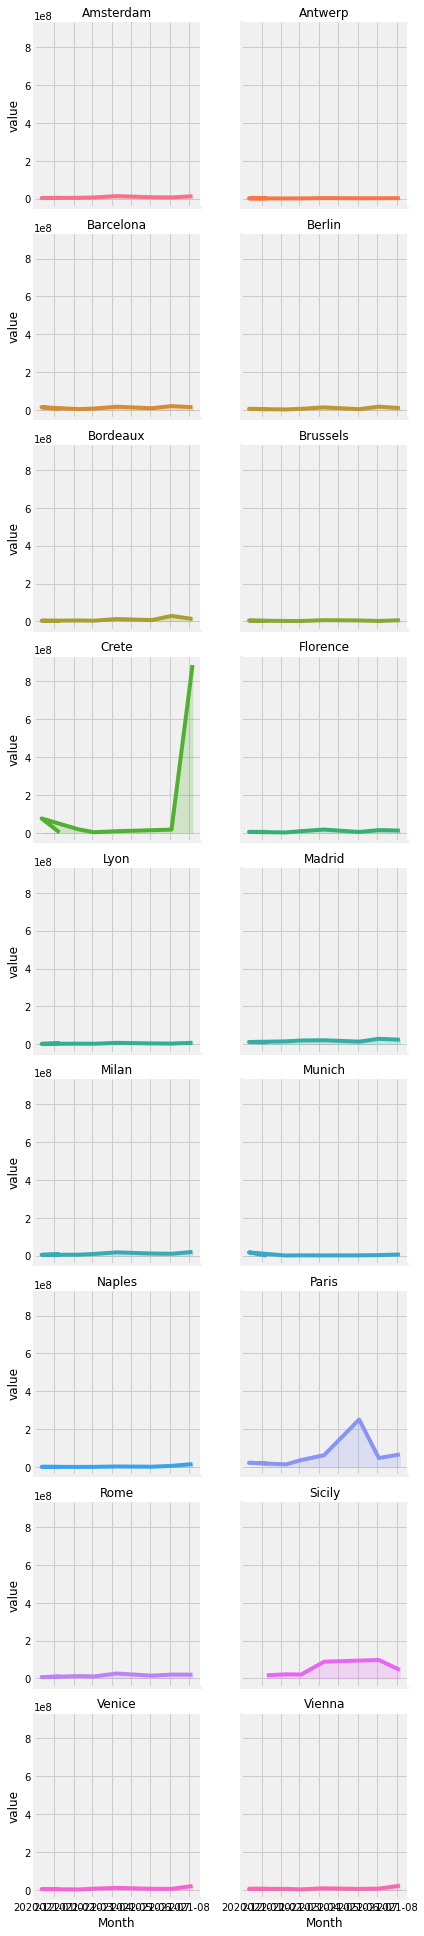

In [249]:

# Create a grid : initialize it
g = sns.FacetGrid(merged_df_value_plot_melt, col='city', hue='city', col_wrap=2)

# Add the line over the area with the plot function
g = g.map(plt.plot, 'Month', 'value')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'Month', 'value', alpha=0.2).set_titles("{col_name}")

In [250]:
pivot_df = merged_df_value_plot_melt.pivot(index='Month', columns='city', values='value')
pivot_df.head()

city,Amsterdam,Antwerp,Barcelona,Berlin,Bordeaux,Brussels,Crete,Florence,Lyon,Madrid,Milan,Munich,Naples,Paris,Rome,Sicily,Venice,Vienna
Month,,,,,,,,,,,,,,,,,,
2020-12-12,2934360.0,1395000.0,14720400.0,6162480.0,3867120.0,4358880.0,75924000.0,5021280.0,2114640.0,11908800.0,4437000.0,17313480.0,1391760.0,22871880.0,7202520.0,NaN,4345920.0,5534640.0
2021-01-09,4385880.0,1573560.0,4837320.0,4034160.0,2077560.0,2623680.0,2406240.0,4866480.0,5848560.0,10414800.0,7833960.0,295560.0,840600.0,19088280.0,10289880.0,17138160.0,5270400.0,5991840.0
2021-02-08,4337280.0,933840.0,4966560.0,3039480.0,5166720.0,2603880.0,18493560.0,2139480.0,3233160.0,15350040.0,5249880.0,943920.0,928080.0,14237640.0,12834360.0,21898080.0,2402640.0,5315400.0
2021-03-04,6179760.0,1252440.0,7592400.0,6524280.0,3987000.0,2346120.0,3413880.0,8956440.0,2769480.0,19900800.0,8951040.0,1912320.0,1262160.0,37110960.0,10895400.0,20919600.0,6698880.0,2832120.0
2021-04-09,13321440.0,2812680.0,17273160.0,14136480.0,12717720.0,6792840.0,8685360.0,17275680.0,7348680.0,21282480.0,17636040.0,1461960.0,3087720.0,62914320.0,26329680.0,88754760.0,10814040.0,8528760.0


<AxesSubplot:xlabel='Month'>

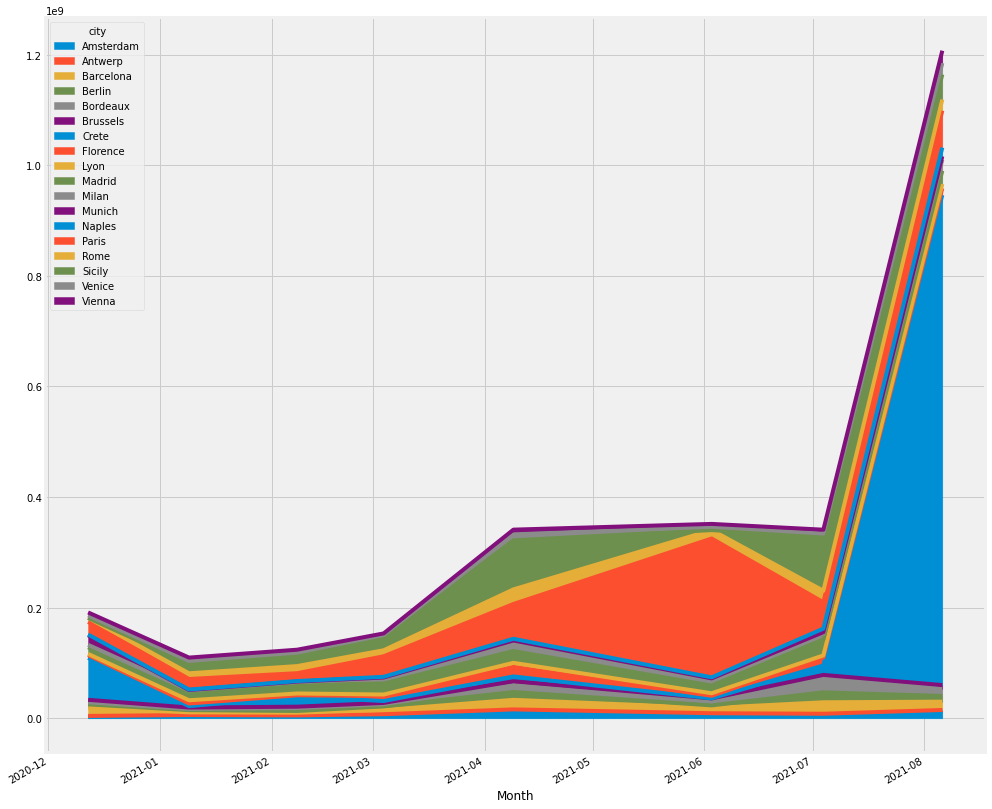

In [251]:
pivot_df.loc[:,['Amsterdam','Antwerp', 'Barcelona','Berlin','Bordeaux','Brussels',
               'Crete','Florence','Lyon','Madrid','Milan','Munich','Naples',
               'Paris','Rome','Sicily','Venice','Vienna']].plot.area(stacked=True, figsize=(15,15))